In [1]:
import pandas as pd
df = pd.read_csv("https://waf.cs.illinois.edu/discovery/berkeley.csv")
df

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,D,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


In [2]:

# Calculate the acceptance and rejection rates for each gender
total_by_gender = df.groupby('Gender').size()
accepted_by_gender = df[df['Admission'] == 'Accepted'].groupby('Gender').size()
rejected_by_gender = df[df['Admission'] == 'Rejected'].groupby('Gender').size()
# Calculate percentages
acceptance_rate_by_gender = (accepted_by_gender / total_by_gender * 100).fillna(0)
rejection_rate_by_gender = (rejected_by_gender / total_by_gender * 100).fillna(0)

# Print results
print("Acceptance Rates by Gender:")
print(acceptance_rate_by_gender)
print("\nRejection Rates by Gender:")
print(rejection_rate_by_gender)

# Calculate the difference in acceptance and rejection rates between men and women
acceptance_diff = acceptance_rate_by_gender.get('M', 0) - acceptance_rate_by_gender.get('F', 0)
rejection_diff = rejection_rate_by_gender.get('M', 0) - rejection_rate_by_gender.get('F', 0)

print("\nDifference in Acceptance Rates (M - F): {:.2f}%".format(acceptance_diff))
print("Difference in Rejection Rates (M - F): {:.2f}%".format(rejection_diff))


Acceptance Rates by Gender:
Gender
F    34.575330
M    44.278607
dtype: float64

Rejection Rates by Gender:
Gender
F    65.424670
M    55.721393
dtype: float64

Difference in Acceptance Rates (M - F): 9.70%
Difference in Rejection Rates (M - F): -9.70%


In [3]:

# Group by Major and Gender to calculate acceptance and rejection rates
grouped = df.groupby(['Major', 'Gender', 'Admission']).size().unstack(fill_value=0)

# Calculate total applicants per group
grouped['Total'] = grouped.sum(axis=1)

# Calculate acceptance and rejection percentages
grouped['Accepted %'] = (grouped.get('Accepted', 0) / grouped['Total']) * 100
grouped['Rejected %'] = (grouped.get('Rejected', 0) / grouped['Total']) * 100

# Print the results
print(grouped[['Accepted %', 'Rejected %']])

Admission     Accepted %  Rejected %
Major Gender                        
A     F        82.407407   17.592593
      M        72.495606   27.504394
B     F        68.000000   32.000000
      M        63.035714   36.964286
C     F        33.895447   66.104553
      M        36.923077   63.076923
D     F        34.933333   65.066667
      M        33.093525   66.906475
E     F        23.918575   76.081425
      M        27.748691   72.251309
F     F         7.331378   92.668622
      M         5.898123   94.101877
Other F        37.691070   62.308930
      M        40.952556   59.047444


In [4]:

# Unstack the Gender level for comparison
acceptance_rates = grouped['Accepted %'].unstack()

# Identify majors where female acceptance rate is higher than male acceptance rate
majors_with_higher_female_acceptance = acceptance_rates[acceptance_rates['F'] > acceptance_rates['M']]

# Print the results
print("Majors with higher female acceptance rate than male acceptance rate:")
print(majors_with_higher_female_acceptance)

Majors with higher female acceptance rate than male acceptance rate:
Gender          F          M
Major                       
A       82.407407  72.495606
B       68.000000  63.035714
D       34.933333  33.093525
F        7.331378   5.898123


In [11]:

# Group by Major, Gender, and Admission to calculate acceptance and rejection rates
grouped = df.groupby(['Major', 'Gender', 'Admission']).size().unstack(fill_value=0)

# Calculate total applicants per group
grouped['Total'] = grouped.sum(axis=1)

# Calculate acceptance percentages
grouped['Accepted %'] = (grouped.get('Accepted', 0) / grouped['Total']) * 100

# Unstack the Gender level for comparison
acceptance_rates = grouped['Accepted %'].unstack()

# Calculate the totals for men and women
total_applicants = df.groupby('Gender').size()
total_accepted = df[df['Admission'] == 'Accepted'].groupby('Gender').size()

total_percentages = pd.DataFrame({
    'Total Applicants %': (total_applicants / total_applicants.sum()) * 100,
    'Accepted %': (total_accepted / total_applicants) * 100
}).fillna(0)

# Prepare data for Plotly table
acceptance_data = []
for major in acceptance_rates.index:
    row = [major]
    for gender in acceptance_rates.columns:
        row.append(f"{acceptance_rates.at[major, gender]:.2f}%")
    acceptance_data.append(row)

# Create the table
fig = go.Figure(data=[go.Table(
    header=dict(values=["Major", "Female", "Male"],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=list(zip(*acceptance_data)),
               fill_color='white',
               align='left'))
])

fig.update_layout(title="Acceptance Rates by Gender by Major")
fig.show()

# Prepare data for total percentages table
total_percentages_data = total_percentages.reset_index()

# Create the totals table
fig2 = go.Figure(data=[go.Table(
    header=dict(values=list(total_percentages_data.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[total_percentages_data.Gender, total_percentages_data['Total Applicants %'], total_percentages_data['Accepted %']],
               fill_color='white',
               align='left'))
])

fig2.update_layout(title="Total Percentages of Applicants and Accepted by Gender")
fig2.show()

In [16]:

# Group by Major, Gender, and Admission to calculate acceptance and rejection rates
grouped = df.groupby(['Major', 'Gender', 'Admission']).size().unstack(fill_value=0)

# Calculate total applicants per group
grouped['Total'] = grouped.sum(axis=1)

# Calculate acceptance percentages
grouped['Accepted %'] = (grouped.get('Accepted', 0) / grouped['Total']) * 100

# Unstack the Gender level for comparison
acceptance_rates = grouped['Accepted %'].unstack()

# Calculate the totals for men and women
total_applicants = df.groupby('Gender').size()
total_accepted = df[df['Admission'] == 'Accepted'].groupby('Gender').size()

# Calculate total percentages of accepted by gender
total_percentages = pd.DataFrame({
    'Total Applicants %': (total_applicants / total_applicants.sum()) * 100,
    'Accepted %': (total_accepted / total_applicants) * 100
}).fillna(0)

# Replace 'Other' with total percentages in the acceptance rates DataFrame
acceptance_rates.loc['Total'] = total_percentages['Accepted %']

# Prepare data for Plotly table
acceptance_data = []
for major in acceptance_rates.index:
    row = [major]
    for gender in acceptance_rates.columns:
        row.append(f"{acceptance_rates.at[major, gender]:.2f}%")
    acceptance_data.append(row)

# Create the table
fig = go.Figure(data=[go.Table(
    header=dict(values=["Major", "Female", "Male"],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=list(zip(*acceptance_data)),
               fill_color='white',
               align='left'))
])

fig.update_layout(title="Acceptance Rates by Gender by Major")
fig.show()

In [33]:
import pandas as pd
import plotly.graph_objects as go

# Load the sample data
df = pd.read_csv("https://waf.cs.illinois.edu/discovery/berkeley.csv")

# Group by Major, Gender, and Admission to calculate acceptance and rejection rates
grouped = df.groupby(['Major', 'Gender', 'Admission']).size().unstack(fill_value=0)

# Calculate total applicants per group
grouped['Total'] = grouped.sum(axis=1)

# Calculate acceptance percentages
grouped['Accepted %'] = (grouped.get('Accepted', 0) / grouped['Total']) * 100

# Unstack the Gender level for comparison
acceptance_rates = grouped['Accepted %'].unstack(fill_value=0)

# Calculate the totals for men and women
total_applicants = df.groupby('Gender').size()
total_accepted = df[df['Admission'] == 'Accepted'].groupby('Gender').size()

# Calculate total percentages of accepted by gender
total_percentages = pd.DataFrame({
    'Total Applicants %': (total_applicants / total_applicants.sum()) * 100,
    'Accepted %': (total_accepted / total_applicants) * 100
}).fillna(0)

# Replace 'Other' with total percentages in the acceptance rates DataFrame
acceptance_rates.loc['Total'] = total_percentages['Accepted %']

# Plot acceptance rates by major and gender
fig = go.Figure()

for gender in acceptance_rates.columns:
    fig.add_trace(go.Bar(
        x=acceptance_rates.index,
        y=acceptance_rates[gender],
        name=f'Accepted % ({gender})',
        text=acceptance_rates[gender].apply(lambda x: f'{x:.2f}%'),
        textposition='auto'
    ))

fig.update_layout(
    title="Acceptance Rates by Major and Gender",
    xaxis_title="Major",
    yaxis_title="Acceptance Rate (%)",
    barmode='group'
)

fig.show()

# Prepare data for total percentages plot
fig2 = go.Figure()

fig2.add_trace(go.Bar(
    x=total_percentages.index,
    y=total_percentages['Total Applicants %'],
    name='Total Applicants %',
    text=total_percentages['Total Applicants %'].apply(lambda x: f'{x:.2f}%'),
    textposition='auto'
))

fig2.add_trace(go.Bar(
    x=total_percentages.index,
    y=total_percentages['Accepted %'],
    name='Accepted %',
    text=total_percentages['Accepted %'].apply(lambda x: f'{x:.2f}%'),
    textposition='auto'
))

fig2.update_layout(
    title="Total Percentages of Applicants and Accepted by Gender",
    xaxis_title="Gender",
    yaxis_title="Percentage (%)",
    barmode='group'
)

fig2.show()


In [27]:
from scipy import stats

# Let's set random seed for reproducibility
np.random.seed(45)

# `b` represents our confounder
b = np.random.rand(100)

# `a` and `c` are causally independent of each other, but they are both children of `b` 
a = b + .1 * np.random.rand(100)
c = b + .3 * np.random.rand(100)

In [30]:
# Let's check correlation between `a` and `c`
coef, p_val = stats.pearsonr(a, c)
print(coef, p_val)

0.9627497625297514 1.8074604177492298e-57


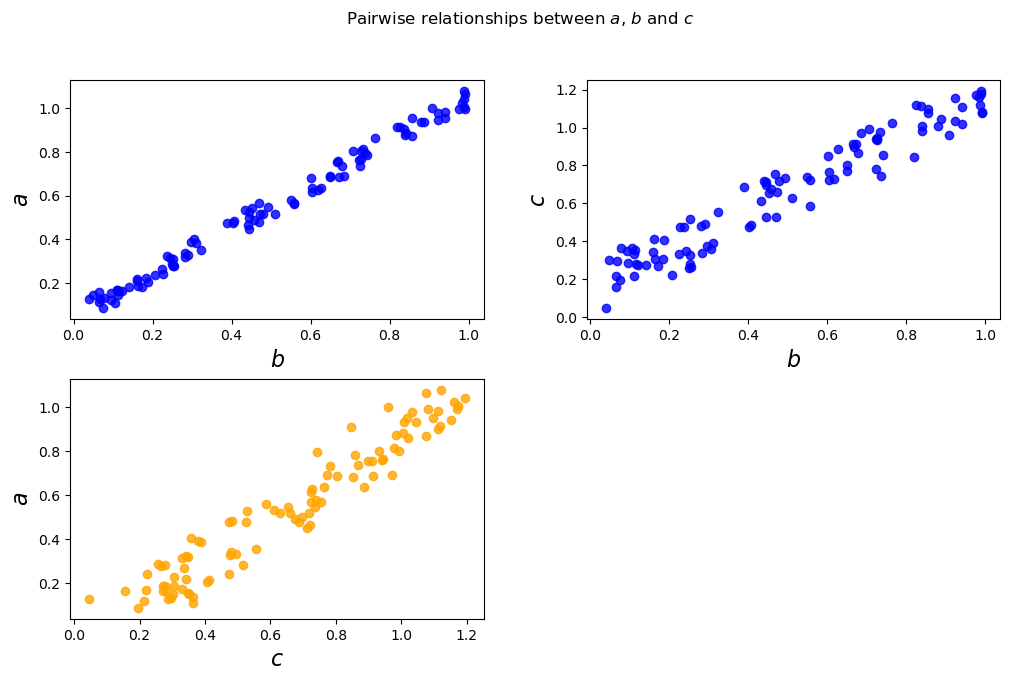

In [29]:
# Define your colors
COLORS = ['blue', 'orange']  

variables = {
    'a': a,
    'b': b,
    'c': c
}

plt.figure(figsize=(12, 7))

for i, (var_1, var_2) in enumerate([('b', 'a'), ('b', 'c'), ('c', 'a')]):
    
    color = COLORS[1]
    
    if 'b' in [var_1, var_2]:
        color = COLORS[0]
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(variables[var_1], variables[var_2], alpha=.8, color=color)
    
    plt.xlabel(f'${var_1}$', fontsize=16)
    plt.ylabel(f'${var_2}$', fontsize=16)

plt.suptitle('Pairwise relationships between $a$, $b$ and $c$')
plt.subplots_adjust(hspace=.25, wspace=.25)
plt.show()

In [3]:

import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from cycler import cycler



default_cycler = (cycler(color=['0.3', '0.5', '0.7', '0.5']) +
                  cycler(linestyle=['-', '--', ':', '-.']) + 
                  cycler(marker=['o', 'v', 'd', 'p']))

color=['0.3', '0.5', '0.7', '0.5']
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']

plt.rc('axes', prop_cycle=default_cycler)
plt.rc('font', size=20)


pd.DataFrame(dict(
    i= [1,2,3,4,5,6],
    y0=[200,120,300, 450,600,600],
    y1=[220,140,400, 500,600,800],
    t= [0,0,0,1,1,1],
    x= [0,0,1,0,0,1],
)).assign(
    y = lambda d: (d["t"]*d["y1"] + (1-d["t"])*d["y0"]).astype(int),
    te=lambda d: d["y1"] - d["y0"]
)

,i,y0,y1,t,x,y,te
0,1,200,220,0,0,200,20
1,2,120,140,0,0,120,20
2,3,300,400,0,1,300,100
3,4,450,500,1,0,500,50
4,5,600,600,1,0,600,0
5,6,600,800,1,1,800,200


In [8]:
data = pd.read_csv('/Users/paulfagan/Downloads/xmas_sales (1).csv')
data.head(6)

,store,weeks_to_xmas,avg_week_sales,is_on_sale,weekly_amount_sold
0,1,3,12.98,1,219.60
1,1,2,12.98,1,184.70
2,1,1,12.98,1,145.75
3,1,0,12.98,0,102.45
4,2,3,19.92,0,103.22
5,2,2,19.92,0,53.73


Baseline avg_week_sales:
  treated mean = 21.58, control mean = 18.78
  t = 14.31, p = 0.000

Naïve ATE (difference in means): 77.95

Adjusted ATE (controlling for avg_week_sales): 68.85

Regression coefficients:
  is_on_sale:          68.85
  avg_week_sales:      3.24
  intercept:           2.15


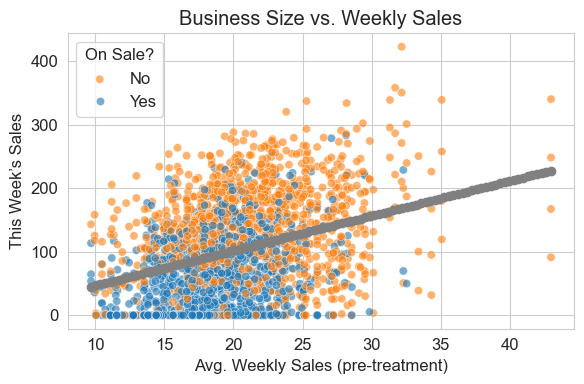

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# ——— 1) Load & inspect
data = pd.read_csv('/Users/paulfagan/Downloads/xmas_sales (1).csv')

# ——— 2) Baseline imbalance in business size
treated = data.loc[data.is_on_sale == 1, "avg_week_sales"]
control = data.loc[data.is_on_sale == 0, "avg_week_sales"]
t_stat, p_val = stats.ttest_ind(treated, control, equal_var=False)

print("Baseline avg_week_sales:")
print(f"  treated mean = {treated.mean():.2f}, control mean = {control.mean():.2f}")
print(f"  t = {t_stat:.2f}, p = {p_val:.3f}\n")

# ——— 3) Naïve ATE on outcome
means = data.groupby("is_on_sale")["weekly_amount_sold"].mean()
naive_ate = means.loc[1] - means.loc[0]
print(f"Naïve ATE (difference in means): {naive_ate:.2f}\n")

# ——— 4) Adjusted ATE via scikit-learn regression
# Prepare design matrix
X = data[["is_on_sale", "avg_week_sales"]].values
y = data["weekly_amount_sold"].values
model = LinearRegression().fit(X, y)
adj_ate = model.coef_[0]
print(f"Adjusted ATE (controlling for avg_week_sales): {adj_ate:.2f}\n")

# Display regression coefficients
print("Regression coefficients:")
print(f"  is_on_sale:          {model.coef_[0]:.2f}")
print(f"  avg_week_sales:      {model.coef_[1]:.2f}")
print(f"  intercept:           {model.intercept_:.2f}")

# ——— 5) Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="avg_week_sales", y="weekly_amount_sold",
    hue="is_on_sale", palette={0:"tab:blue",1:"tab:orange"},
    data=data, alpha=0.6
)
# regression line (pooled)
sns.regplot(
    x="avg_week_sales", y="weekly_amount_sold",
    data=data, scatter=False, ci=None, color="gray"
)
plt.title("Business Size vs. Weekly Sales")
plt.xlabel("Avg. Weekly Sales (pre-treatment)")
plt.ylabel("This Week’s Sales")
plt.legend(title="On Sale?", labels=["No","Yes"])
plt.tight_layout()
plt.show()

In [15]:
import numpy as np
import pandas as pd
from scipy import stats

# 1. Load and bucket
data = pd.read_csv('/Users/paulfagan/Downloads/xmas_sales (1).csv')
data["size_bucket"] = pd.qcut(data["avg_week_sales"], q=3, labels=False)

# 2. Within each bucket, assign exactly half to treatment
def block_randomize(df, seed=42):
    rng = np.random.default_rng(seed)
    n = len(df)
    # if odd, one extra goes to control
    n_treat = n//2
    labels = np.array([1]*n_treat + [0]*(n-n_treat))
    rng.shuffle(labels)
    df = df.copy()
    df["promo_block"] = labels
    return df

balanced = data.groupby("size_bucket", group_keys=False).apply(block_randomize)

# 3. Check balance again
grp = balanced.groupby("promo_block")["avg_week_sales"]
print("Mean avg_week_sales by arm:")
print(grp.mean().round(3))

t, p = stats.ttest_ind(
    balanced.loc[balanced.promo_block==1, "avg_week_sales"],
    balanced.loc[balanced.promo_block==0, "avg_week_sales"],
    equal_var=False
)
print(f"t={t:.2f}, p={p:.3f}  →  balanced?  {'yes' if p>.05 else 'no'}")

# 4. Estimate the unconfounded ATE
ate = (
    balanced.loc[balanced.promo_block==1, "weekly_amount_sold"].mean()
  - balanced.loc[balanced.promo_block==0, "weekly_amount_sold"].mean()
)
print(f"Unconfounded ATE = {ate:.2f}")

Mean avg_week_sales by arm:
promo_block
0    20.284
1    20.145
Name: avg_week_sales, dtype: float64
t=-0.67, p=0.501  →  balanced?  yes
Unconfounded ATE = -4.02


In [14]:
ate = (
    data.loc[data.promo_strat==1, "weekly_amount_sold"].mean()
  - data.loc[data.promo_strat==0, "weekly_amount_sold"].mean()
)
print(f"Unconfounded ATE = {ate:.2f}")

Unconfounded ATE = 1.53


/var/folders/nf/4wc9544n4vn1fsh67xg05_kh0000gn/T/ipykernel_46731/4192953318.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


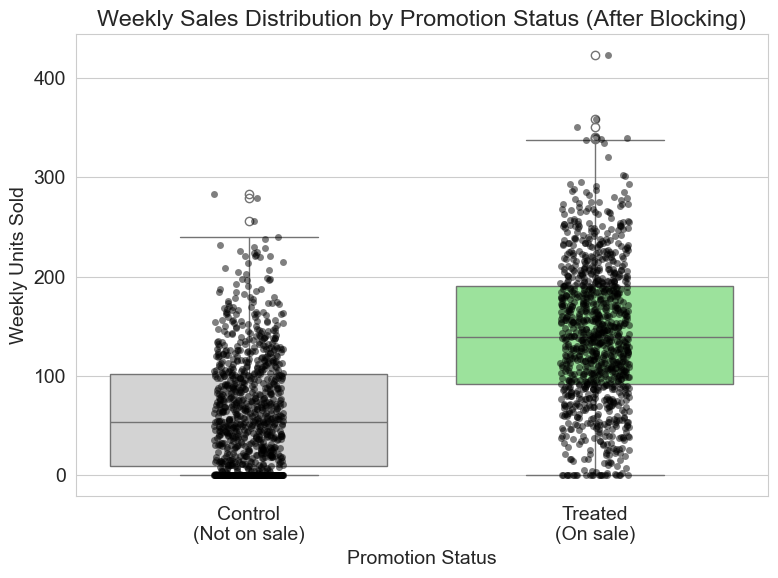

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='is_on_sale',
    y='weekly_amount_sold',
    data=data,
    palette=['lightgray', 'lightgreen']
)
sns.stripplot(
    x='is_on_sale',
    y='weekly_amount_sold',
    data=data,
    color='black',
    alpha=0.5,
    jitter=True
)
plt.xticks([0, 1], ['Control\n(Not on sale)', 'Treated\n(On sale)'])
plt.xlabel('Promotion Status')
plt.ylabel('Weekly Units Sold')
plt.title('Weekly Sales Distribution by Promotion Status (After Blocking)')
plt.tight_layout()
plt.show()

/var/folders/nf/4wc9544n4vn1fsh67xg05_kh0000gn/T/ipykernel_46731/1115543893.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/nf/4wc9544n4vn1fsh67xg05_kh0000gn/T/ipykernel_46731/1115543893.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


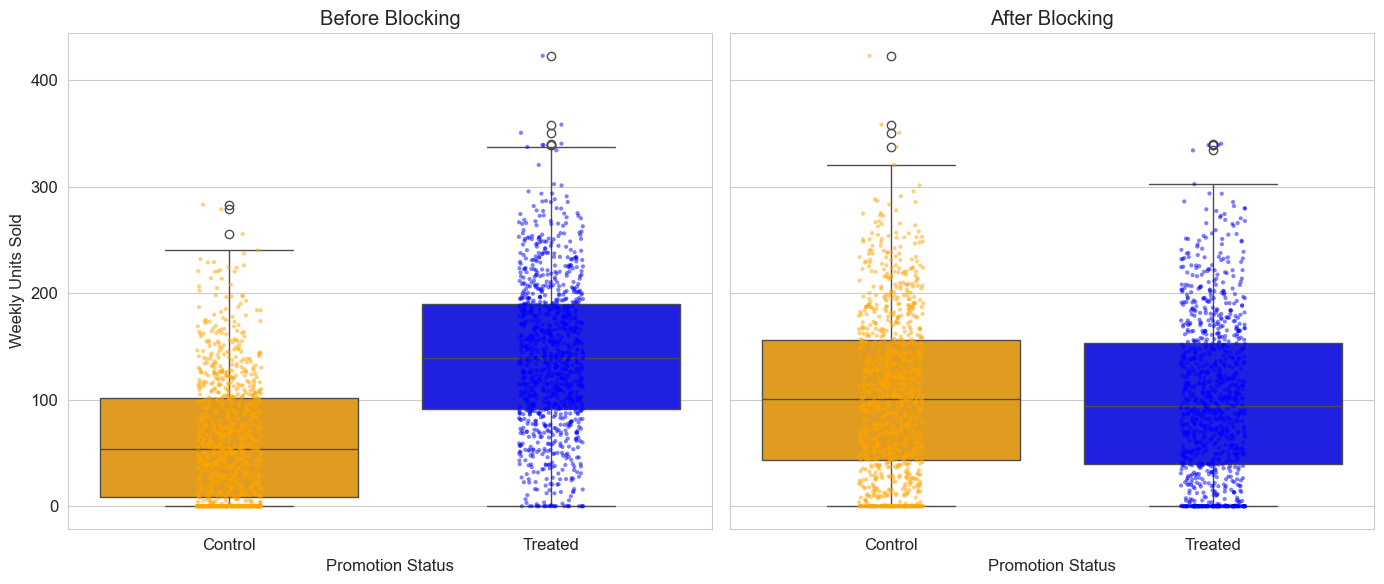

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Add human‐readable labels
balanced["Before"] = balanced["is_on_sale"].map({0: "Control", 1: "Treated"})
balanced["After"]  = balanced["promo_block"].map({0: "Control", 1: "Treated"})

# Define a consistent palette
palette = {"Control": "orange", "Treated": "blue"}

# 5. Plot
plt.rc('font', size=12)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, stage in zip(axes, ["Before", "After"]):
    # Boxplot
    sns.boxplot(
        x=stage,
        y="weekly_amount_sold",
        data=balanced,
        ax=ax,
        palette=palette,
        order=["Control", "Treated"]
    )
    # Overlay stripplot
    sns.stripplot(
        x=stage,
        y="weekly_amount_sold",
        data=balanced,
        ax=ax,
        hue=stage,
        palette=palette,
        dodge=False,
        size=3,
        alpha=0.5,
        order=["Control", "Treated"],
        legend=False
    )
    ax.set_title(f"{stage} Blocking")
    ax.set_xlabel("Promotion Status")
    if stage == "Before":
        ax.set_ylabel("Weekly Units Sold")
    else:
        ax.set_ylabel("")

plt.tight_layout()
plt.show()

In [19]:
# 1) inspect your columns
print(df.columns.tolist())

['store', 'weeks_to_xmas', 'avg_week_sales', 'is_on_sale', 'weekly_amount_sold', 'Before']
